****Sentiment Classification****

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [10]:
df=pd.read_csv('/content/IMDB Dataset.csv',engine='python',on_bad_lines='skip')

In [11]:
df.shape

(37223, 2)

In [12]:
df.size

74446

In [13]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37223 entries, 0 to 37222
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     37223 non-null  object
 1   sentiment  37223 non-null  object
dtypes: object(2)
memory usage: 581.7+ KB


In [15]:
df.describe().T

,count,unique,top,freq
review,37223,36989,Loved today's show!!! It was a variety and not...,5
sentiment,37223,2,negative,18634


### Check class balance

In [16]:
df['sentiment'].value_counts()

,count
sentiment,
negative,18634
positive,18589


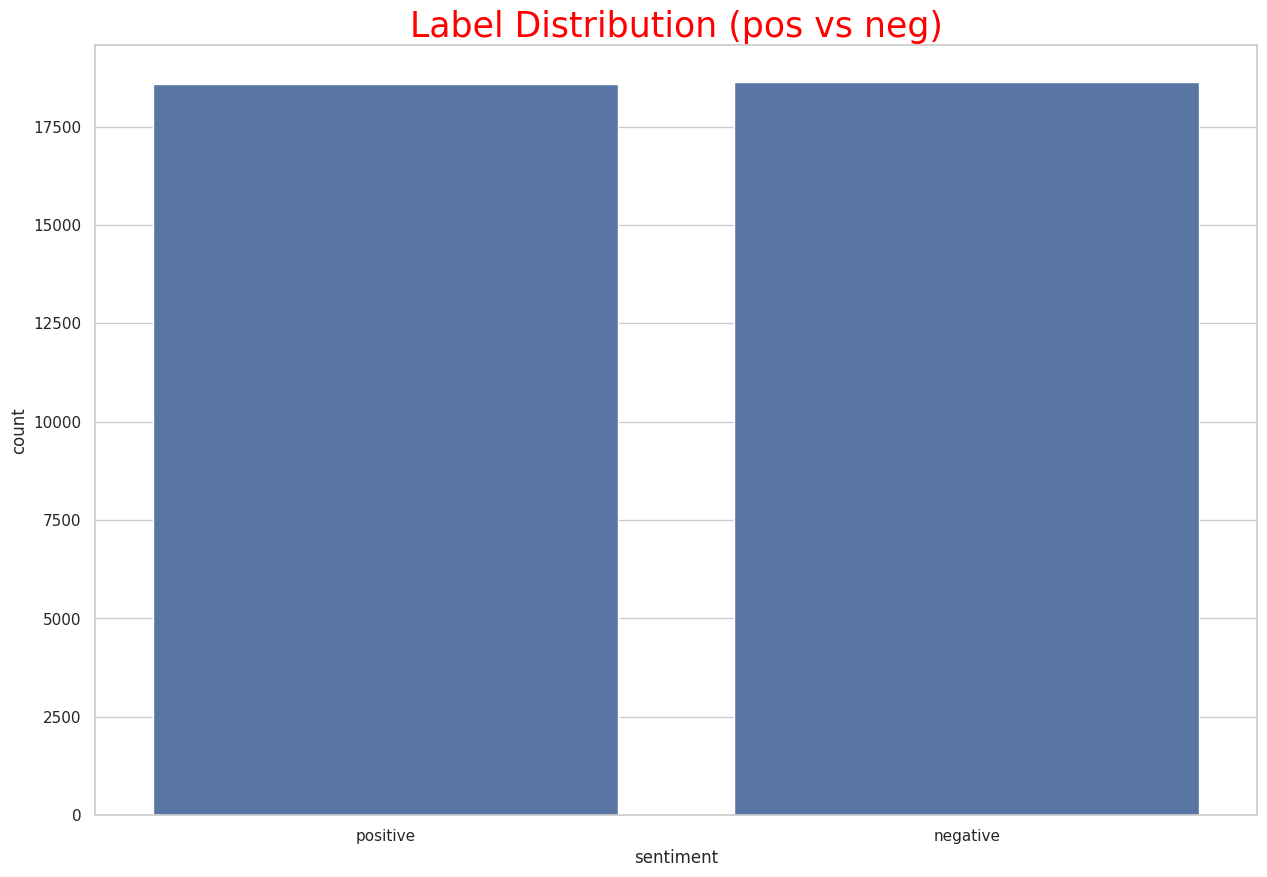

In [17]:
## Label distribution plot
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
ax=sns.countplot(x='sentiment',data=df)
ax.set_title("Label Distribution (pos vs neg)",fontsize=25,color='Red')
plt.show()

#### The above data set is perfectly balanced

## Review Length (Word Count) Distribution

In [18]:
df['review_length']=df['review'].str.len()

In [19]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


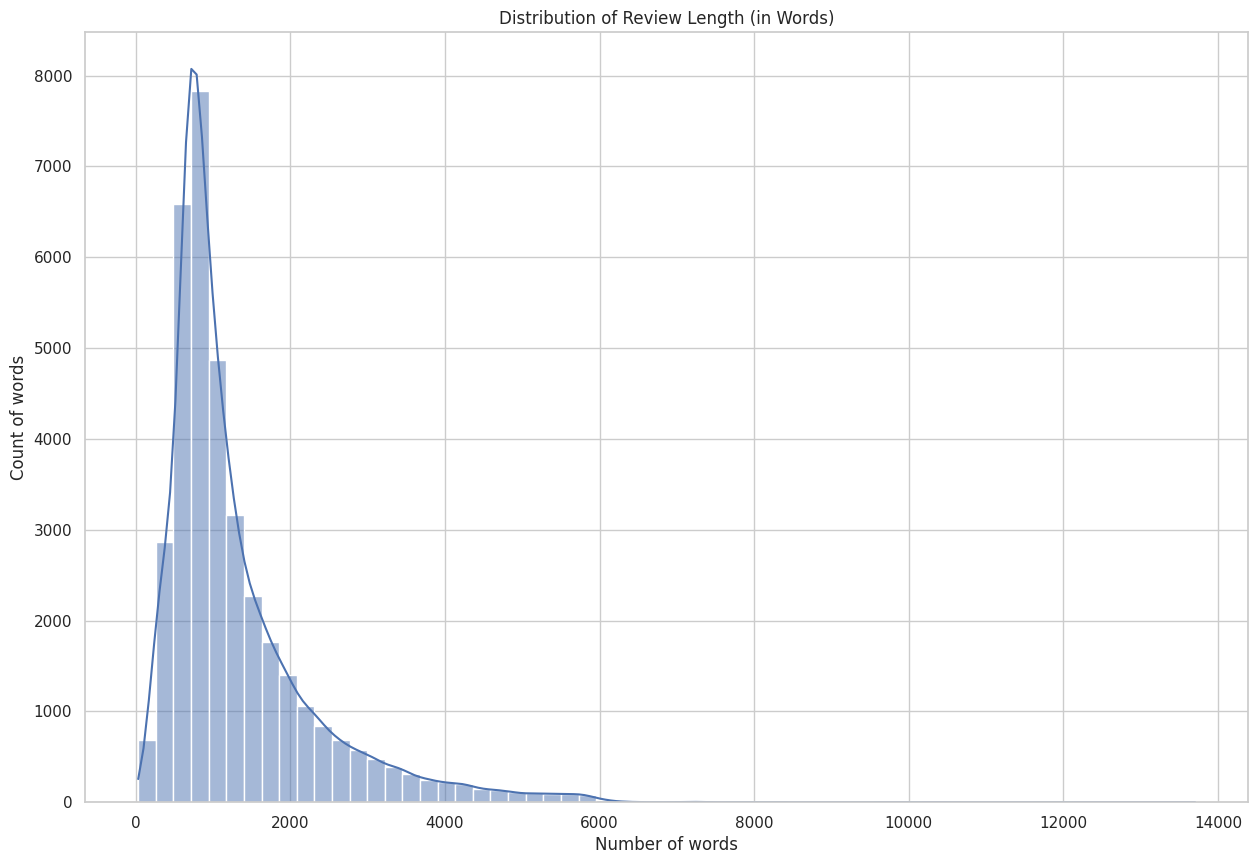

In [20]:
plt.figure(figsize=(15,10))
sns.histplot(df['review_length'],bins=60,kde=True)
plt.title("")
plt.title("Distribution of Review Length (in Words)")
plt.xlabel("Number of words")
plt.ylabel('Count of words')
plt.show()

In [21]:
## Compare Review Length: Positive vs Negative
df.groupby("sentiment")['review_length'].describe().T

sentiment,negative,positive
count,18634.000000,18589.000000
mean,1293.864066,1324.458443
std,942.236599,1033.999420
min,32.000000,65.000000
25%,707.000000,691.000000
50%,973.000000,965.000000
75%,1571.000000,1612.000000
max,8754.000000,13704.000000


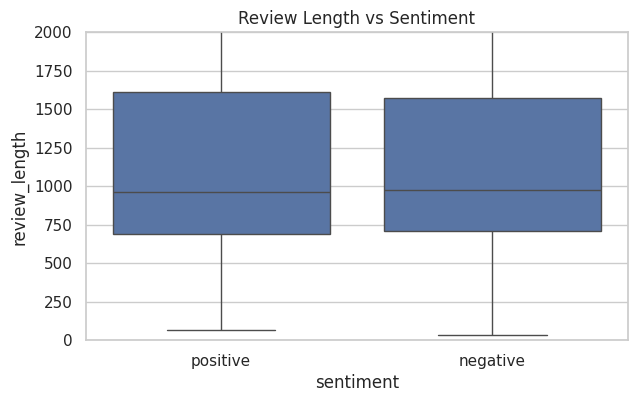

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(x="sentiment", y="review_length", data=df)
plt.title("Review Length vs Sentiment")
plt.ylim(0, 2000)   # limit to remove extreme outliers from view
plt.show()

In [23]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
STOPWORDS=set(stopwords.words("english"))

In [25]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [26]:
def clean_text(text,remove_stopwords=True,do_lemmatize=True):
  if not isinstance(text,str):
    text=str(text)
  ##LowerCase
  text=text.lower()

 ## Remove Html tags
  text=re.sub(r'<.*?>',' ',text)

 ## Remove URLs
  text=re.sub(r'http\S+|www\.\S+',' ',text)

  ##Remove punctuation
  text=text.translate(str.maketrans('','',string.punctuation))

  ##Remove digits
  text=re.sub(r'\d+',' ',text)

  text=re.sub(r'\s+',' ',text).strip()

  tokens = text.split()

  if remove_stopwords:
    tokens=[t for t in tokens if t not in STOPWORDS]

  if do_lemmatize:
    tokens=[lemmatizer.lemmatize(t) for t in tokens]

  return " ".join(tokens)


In [27]:
import string
df['clean_review']=df['review'].astype(str).apply(clean_text)
df[['review', 'clean_review']].head(3)

,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...


In [28]:
df.isnull().sum()

,0
review,0
sentiment,0
review_length,0
clean_review,0


In [29]:
df['review'].duplicated().sum()          # duplicates in raw reviews


np.int64(234)

In [30]:
df['clean_review'].duplicated().sum()    # duplicates after cleaning


np.int64(239)

In [31]:
df.duplicated().sum()

np.int64(234)

In [32]:
df = df.drop_duplicates(subset=['review'])
df = df.reset_index(drop=True)

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
domain_stopwords = {"film", "movie", "one", "story", "like", "time"}


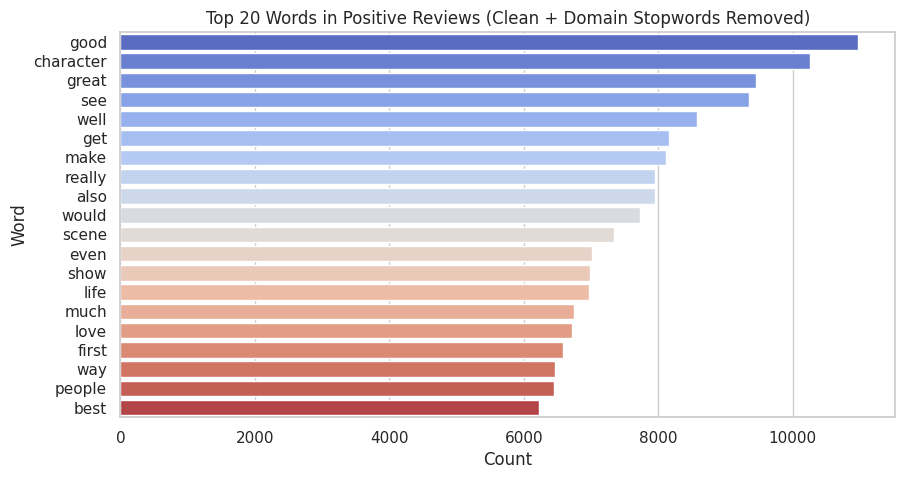

In [35]:
# Step 2.1 — Remove domain-specific stopwords in positive reviews

from collections import Counter

pos_clean = df[df["sentiment"] == "positive"]["clean_review"]

# Split all words
all_pos_words = " ".join(pos_clean).split()

# Remove both stopwords
all_pos_words = [w for w in all_pos_words if w not in STOPWORDS and w not in domain_stopwords]

# Get top 20
pos_counts = Counter(all_pos_words).most_common(20)

words = [w for w, c in pos_counts]
counts = [c for w, c in pos_counts]

plt.figure(figsize=(10,5))
sns.barplot(x=counts, y=words, palette="coolwarm")
plt.title("Top 20 Words in Positive Reviews (Clean + Domain Stopwords Removed)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


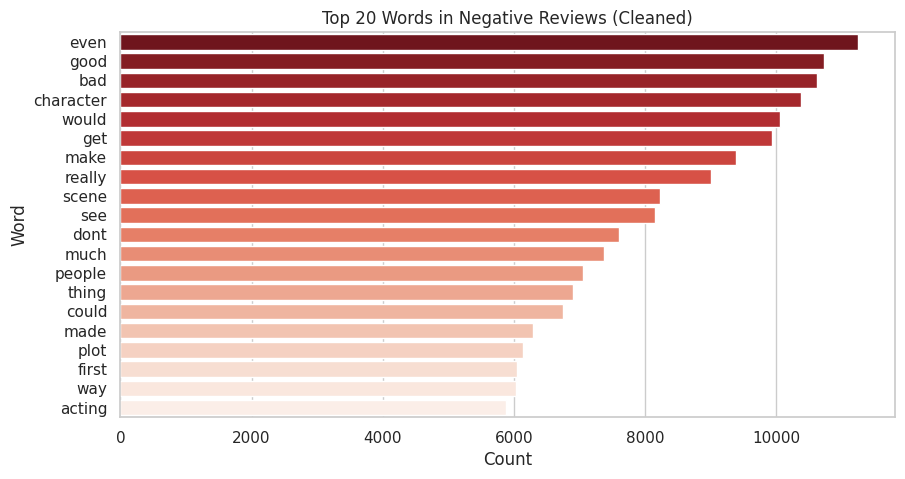

In [36]:
neg_clean=df[df['sentiment']=="negative"]['clean_review']
all_neg_words=" ".join(neg_clean).split()
all_neg_words=[w for w in all_neg_words if w not in STOPWORDS and w not in domain_stopwords]
neg_counts = Counter(all_neg_words).most_common(20)
words = [w for w, c in neg_counts]
counts = [c for w, c in neg_counts]

plt.figure(figsize=(10,5))
sns.barplot(x=counts, y=words, palette="Reds_r")
plt.title("Top 20 Words in Negative Reviews (Cleaned)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
X = df["clean_review"]
Y = df["sentiment"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [38]:
print("TRAIN size:", len(X_train))
print("TEST size:", len(X_test))

TRAIN size: 29591
TEST size: 7398


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2),stop_words='english')
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape (train):", X_train_tfidf.shape)
print("TF-IDF shape (test):", X_test_tfidf.shape)


TF-IDF shape (train): (29591, 5000)
TF-IDF shape (test): (7398, 5000)


In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_tfidf,Y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Y_pred=lr.predict(X_test_tfidf)
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc)
print("\n--- Classification Report ---")
print(classification_report(Y_test, Y_pred))


Accuracy: 0.8855095971884293

--- Classification Report ---
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      3699
    positive       0.88      0.90      0.89      3699

    accuracy                           0.89      7398
   macro avg       0.89      0.89      0.89      7398
weighted avg       0.89      0.89      0.89      7398



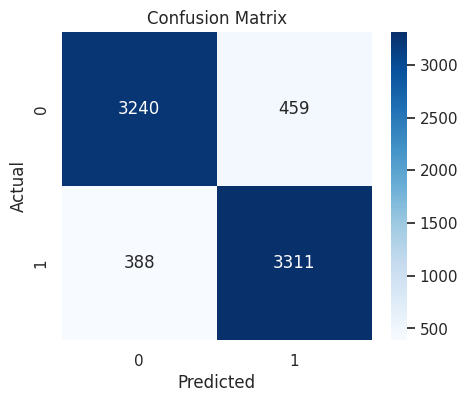

In [42]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Linear SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

print("Models loaded:", list(models.keys()))


Models loaded: ['Logistic Regression', 'Linear SVM', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'KNN']


In [44]:
# Step 3 — Train & evaluate each model

from sklearn.metrics import accuracy_score

results = {}   # to store accuracy of each model

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, Y_train)      # train model
    y_pred = model.predict(X_test_tfidf)   # test prediction

    acc = accuracy_score(Y_test, Y_pred)   # calculate accuracy
    results[name] = acc                    # store result

    print(f"{name} Accuracy: {acc}")
    print("-" * 40)

print("\nAll models evaluated!")


Training Logistic Regression...
Logistic Regression Accuracy: 0.8855095971884293
----------------------------------------
Training Linear SVM...
Linear SVM Accuracy: 0.8855095971884293
----------------------------------------
Training Naive Bayes...
Naive Bayes Accuracy: 0.8855095971884293
----------------------------------------
Training Random Forest...
Random Forest Accuracy: 0.8855095971884293
----------------------------------------
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8855095971884293
----------------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.8855095971884293
----------------------------------------
Training KNN...
KNN Accuracy: 0.8855095971884293
----------------------------------------

All models evaluated!


In [45]:
for name, model in models.items():
    preds = model.predict(X_test_tfidf)
    print(name, "unique predictions:", set(preds))

Logistic Regression unique predictions: {'positive', 'negative'}
Linear SVM unique predictions: {'positive', 'negative'}
Naive Bayes unique predictions: {np.str_('positive'), np.str_('negative')}
Random Forest unique predictions: {'positive', 'negative'}
Gradient Boosting unique predictions: {'positive', 'negative'}
Decision Tree unique predictions: {'positive', 'negative'}
KNN unique predictions: {'positive', 'negative'}


Deep Learning Models:

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding,Dense,LSTM,GRU,Bidirectional,Conv1D,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping